In [1]:
%matplotlib inline

import sys
from enum import Enum
from collections import OrderedDict

import csv, math, string
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from scrapers import logger
from Truth import Page, get_truth_value, get_truth_value_old, get_utfidf, get_truth_matrices, get_mx


from sklearn.metrics import roc_curve, confusion_matrix, classification_report


from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

logger.ignorewarnings = True
color = plt.cm.Blues

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leryc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\Leryc\Envs\thesis\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Classification Task

Statements in the form of "Politician $p_{i}$ endorses ideology $i_{j}$ are considered. A matrix of all possible combinations of subjects and objects were then obtained. Each path in the matrix was evaluated to obtain its truth value.

Three different truth matrices are obtained:
1. Truth value matrix using metric closure, with TF-IDF and cosine similarity
2. Truth value matrix using ultrametric closure, with TF-IDF and cosine similarity
3. Truth value matrix using metric closure, using generality only (theoretical framework)

**Get truth matrices**

In [ ]:
df = pd.read_csv('data/out/i2.csv', sep=';', index_col=0)
mt, ut, mold = get_truth_matrices(df)

**Get target column**

In [84]:
def isDemocrat(entity):
    return entity.endswith('(R)')
y = [isDemocrat(x) for x in i1_mt.index]

Display the resulting matrix

In [ ]:
i1_mt[:5]

**Classify the truth values into R or D using SVM**

Mean cross-validation accuracy: 0.69
             precision    recall  f1-score   support

      False  0.6860465116 0.6704545455 0.6781609195        88
       True  0.6881720430 0.7032967033 0.6956521739        91

avg / total  0.6871270890 0.6871508380 0.6870531215       179



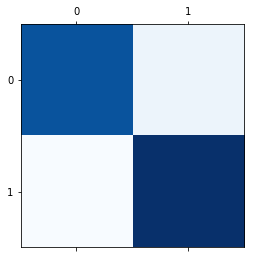

In [164]:
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=3)
svm_clf = SVC(C=2**15, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_mt,y,cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_mt, y, cv=5)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

Display ROC Curve

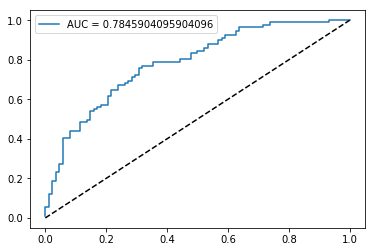

In [178]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(svm_clf, i1_mt, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

fpr, tpr, thresh = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)
plt.plot(fpr,tpr,label="AUC = "+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


**Get the DW NOMINATE SCORE**

In [103]:
dwn = pd.read_csv('data/dwnominate/dwnoms.csv')
dwn_scores = dwn['nominate_dim1']

**Line Plot**

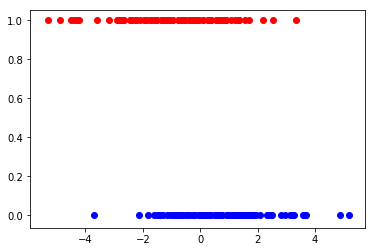

In [166]:
preds = list(zip(y, y_scores, dwn_scores))

democrats = [x[1] for x in preds if x[0]]
democrats_dw = [x[2] for x in preds if x[0]]

republicans = [x[1] for x in preds if not x[0]]
republicans_dw = [x[2] for x in preds if not x[0]]

import numpy as np
import matplotlib.pyplot as plt

plt.scatter(democrats,np.zeros_like(democrats), c='b')
plt.scatter( republicans,np.ones_like(republicans), c='r')

#plt.yticks([])
plt.show()

## Validation Using Ultrametric Closure

Mean cross-validation accuracy: 0.50
             precision    recall  f1-score   support

      False  0.5243902439 0.4886363636 0.5058823529        88
       True  0.5360824742 0.5714285714 0.5531914894        91

avg / total  0.5303343386 0.5307262570 0.5299333664       179



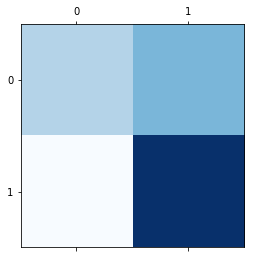

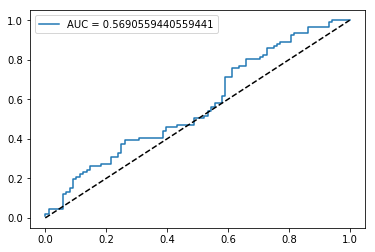

In [179]:
def isDemocrat(entity):
    return entity.endswith('(R)')

i1_ut


from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_ut,y,cv=15)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_ut, y, cv=5)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

yw_scores = cross_val_predict(svm_clf, i1_ut, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, yw_scores)

fpr, tpr, thresh = roc_curve(y, yw_scores)
auc = roc_auc_score(y, yw_scores)
plt.plot(fpr,tpr,label="AUC = "+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


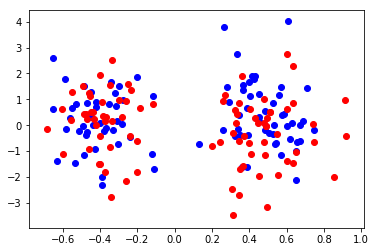

In [173]:
preds = list(zip(y, yw_scores, dwn_scores))

democrats = [x[1] for x in preds if x[0]]
democrats_dw = [x[2] for x in preds if x[0]]

republicans = [x[1] for x in preds if not x[0]]
republicans_dw = [x[2] for x in preds if not x[0]]

import numpy as np
import matplotlib.pyplot as plt

plt.scatter(democrats_dw,democrats, c='b')
plt.scatter( republicans_dw,republicans, c='r')

#plt.yticks([])
plt.show()

## Classification Task (Previous Paper)


Mean cross-validation accuracy: 0.69
             precision    recall  f1-score   support

      False  0.7285714286 0.5795454545 0.6455696203        88
       True  0.6605504587 0.7912087912 0.7200000000        91

avg / total  0.6939909355 0.6871508380 0.6834085284       179



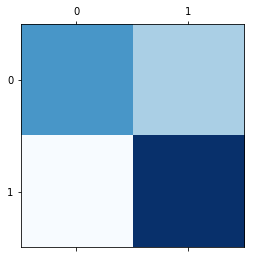

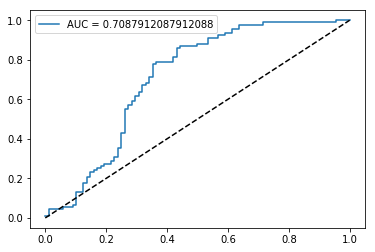

In [180]:
def isDemocrat(entity):
    return entity.endswith('(R)')

from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_mold,y,cv=15)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_mold, y, cv=15)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(svm_clf, i1_mold, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

fpr, tpr, thresh = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)
plt.plot(fpr,tpr,label="AUC = "+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


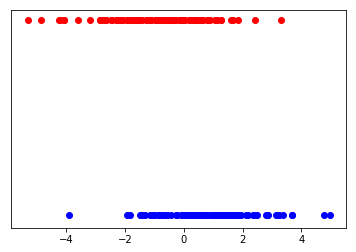

In [91]:
preds = list(zip(y, y_scores))

democrats = [x[1] for x in preds if x[0]]
republicans = [x[1] for x in preds if not x[0]]
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(democrats, np.zeros_like(democrats), 
            c='b', cmap="hot_r", vmin=-2)
plt.scatter(republicans, np.ones_like(republicans), 
            c='r', cmap="hot_r", vmin=-2)

plt.yticks([])
plt.show()

# Validation on Factual Statements

Simple statements various subject areas were tested. Statements in the form of "$p_{i}$ was married to $s_{j}$" were considered, where $p_{i}$ is a US president, and $s_{j}$ is a spouse of a US president. A matrix of statements was then obtained by getting all the combinations of subjects and objects.

In [ ]:
df = pd.read_csv('data/out/t2_output.csv', sep=';', index_col=0)
print(df.shape)

Map the truth value function to the Path matrix.

In [ ]:
w_new, w_u_new, w_mold = get_truth_matrices(df)

Get the confusion matrix of the truth values.

C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


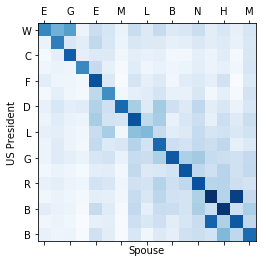

In [55]:
vmin = 0
vmax = 1

%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.xlabel('Spouse')
plt.ylabel('US President')

ax.matshow(w_new, cmap=color)
ax.set_xticklabels([' ']+[x[0] for x in w_new.keys()][::2])
ax.set_yticklabels([' ']+[x[0] for x in w_new.index][::2])
fig.show()

0.5825043252595155


C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


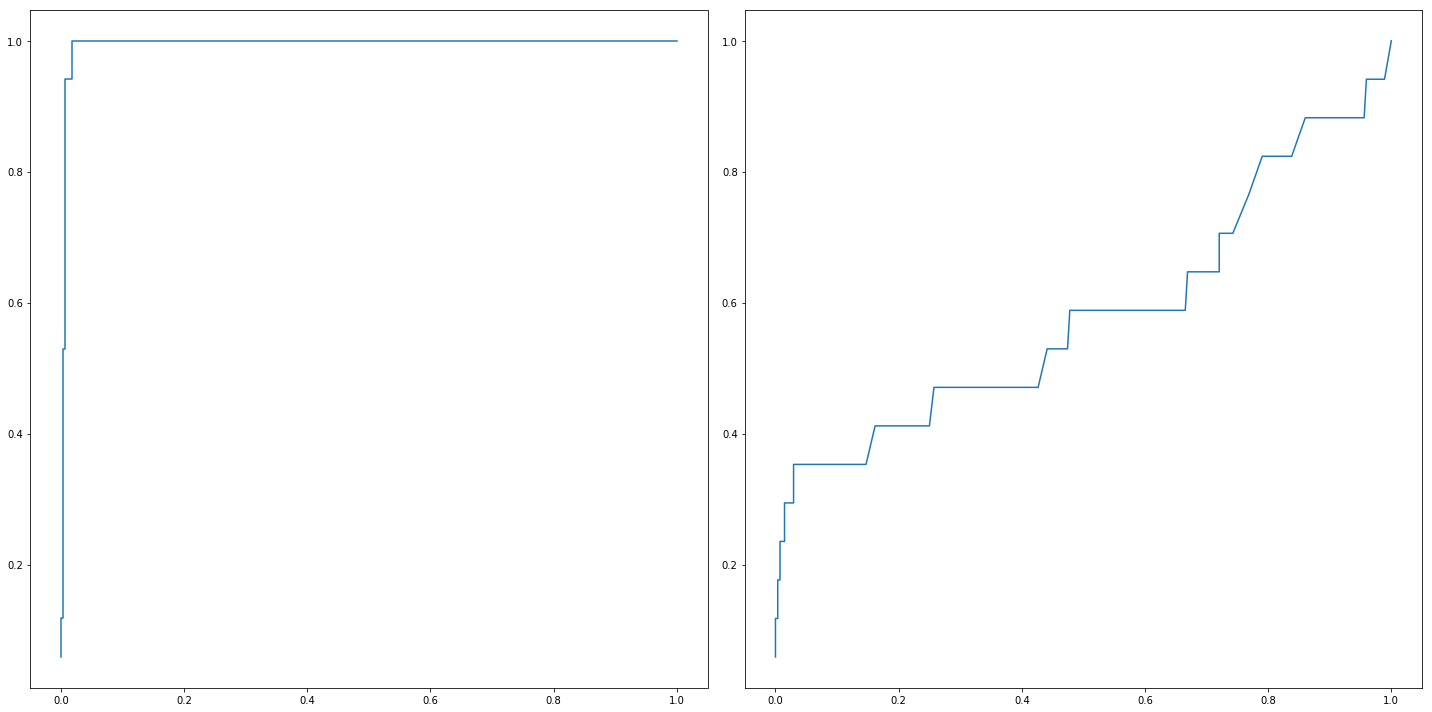

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


vfs_w_y, vfs_w_y_score = get_mx(w_new)
#ay_score = cross_val_predict(svm_clf, conf_mx, y, cv=15, method="decision_function")



#-------------------
vfs_w_y_old, vfs_w_y_score_old = get_mx(w_mold)
roc1_fig, roc1_ax = plt.subplots(1,2, figsize=(20,10))




fprH, tprH, threshH = roc_curve(vfs_w_y, vfs_w_y_score)
auc = roc_auc_score(vfs_w_y_old, vfs_w_y_score_old)
print(auc)
roc1_ax[0].plot(fprH, tprH)

#-------------------
vfs_w_y, vfs_w_y_score = get_mx(w_new)
fprH, tprH, threshH = roc_curve(vfs_w_y_old, vfs_w_y_score_old)
roc1_ax[1].plot(fprH, tprH)

roc1_fig.tight_layout()
roc1_fig.show()
#-------------------
plt.show()



Mean cross-validation accuracy: 0.99
0.9939446366782008


array([ 0.43910638, -2.12507651, -2.26668016, -2.46708253, -1.66317726,
       -1.95667497, -2.42675649, -1.62626536, -2.11946323, -1.56619909,
       -2.10984773, -2.00811753, -1.66427145, -2.22618343, -1.98872062,
       -2.34841868, -1.96276204, -2.41259515,  0.60336236, -1.98772864,
       -2.22770445, -1.46972523, -1.99564373, -2.46847555, -2.01413417,
       -2.11616649, -2.11126022, -2.34049128, -2.26083045, -2.03222289,
       -2.24316156, -2.1480034 , -2.37840224, -2.04873519, -2.66615501,
       -2.3002138 ,  1.21080799, -2.31060636, -2.10639261, -2.13307946,
       -2.57715456, -2.28888352, -2.39887489, -2.33652042, -2.63716315,
       -2.61658696, -2.33442772, -2.50501954, -2.20460482, -2.67906969,
       -2.03006981, -2.56315747, -2.450547  , -2.52097657,  0.43894751,
       -1.54215209, -2.34475755, -2.70965473, -2.18778068, -2.53776391,
       -2.41832524, -2.53071054, -2.50224906, -2.29020648, -2.48661761,
       -2.3731415 , -2.57984924, -1.97724161, -2.23795952, -2.51

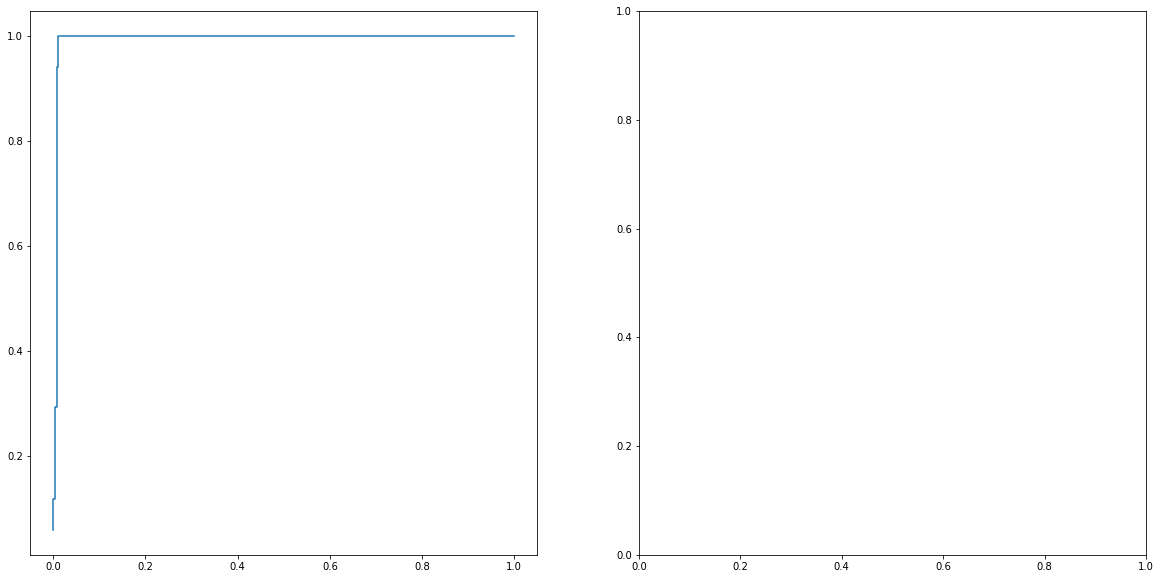

In [52]:
#from sklearn.neighbors import KNeighborsClassfier

import sklearn
from sklearn.svm import SVC
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

svm_clf = SVC(C=2**14, kernel='linear')
a = vfs_w_y_score.reshape(-1,1)
from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(knn,a,vfs_w_y,cv=3)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))


#vfs_w_y_old, vfs_w_y_score_old = get_mx(w_mold)
roc1_fig, roc1_ax = plt.subplots(1,2, figsize=(20,10))

y_scores = cross_val_predict(svm_clf, a, vfs_w_y, cv=8, method='decision_function')
#y_scores = cross_val_predict(knn, a, vfs_w_y, cv=3)
fprH, tprH, threshH = roc_curve(vfs_w_y, y_scores)
auc = roc_auc_score(vfs_w_y, y_scores)
print(auc)
roc1_ax[0].plot(fprH, tprH)

y_scores

In [46]:
threshH

array([2, 1, 0])

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_mold,y,cv=15)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_mold, y, cv=15)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

### Validation of World Capitals

In [ ]:
df_capitals = pd.read_csv('data/out/t3_countries.csv', sep=';', index_col=0)
df_capitals.shape

Map the truth value function to the matrix

In [ ]:
c_new, c_u_new, c_u_mold = get_truth_matrices(df_capitals)

Show confusion matrix

C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


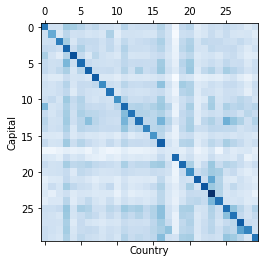

In [7]:
vmin = 0
vmax = 1
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.xlabel('Country')
plt.ylabel('Capital')
ax.matshow(c_new, cmap=color)
fig.show()

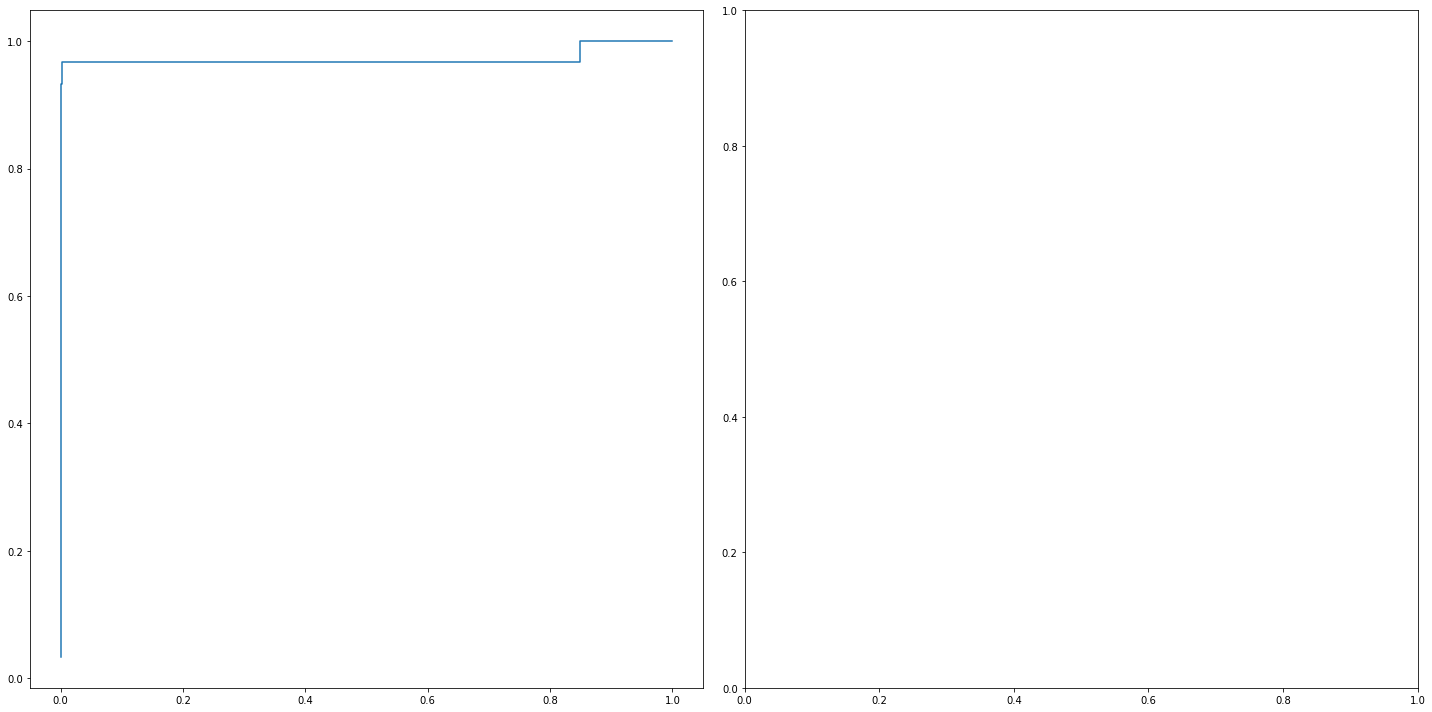

In [40]:
#ROC

vfs2_y, vfs2_y_score = get_mx(c_new)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc2_fig, roc2_ax = plt.subplots(1,2, figsize=(20,10))
#ay_score = cross_val_predict(svm_clf, conf_mx, y, cv=15, method="decision_function")
fprH, tprH, threshH = roc_curve(vfs2_y, vfs2_y_score)
roc2_fig.tight_layout()

roc2_ax[0].plot(fprH, tprH)

### Validation of Directors / Movies

In [112]:
df_movies = pd.read_csv('data/out/t4_movies.csv', sep=';', index_col=0, encoding='utf-8')
df_movies.shape

(29, 29)

**Map the truth value function to the matrix**

In [ ]:
d_new, d_u_new, d_mold = get_truth_matrices(df_movies)

C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


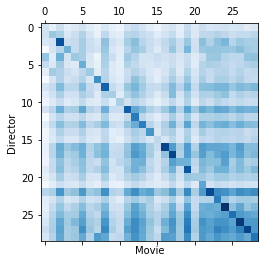

In [5]:
vmin = 0
vmax = 1
color = plt.cm.Blues

%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.xlabel('Movie')
plt.ylabel('Director')
ax.matshow(d_new, cmap=color)
fig.show()

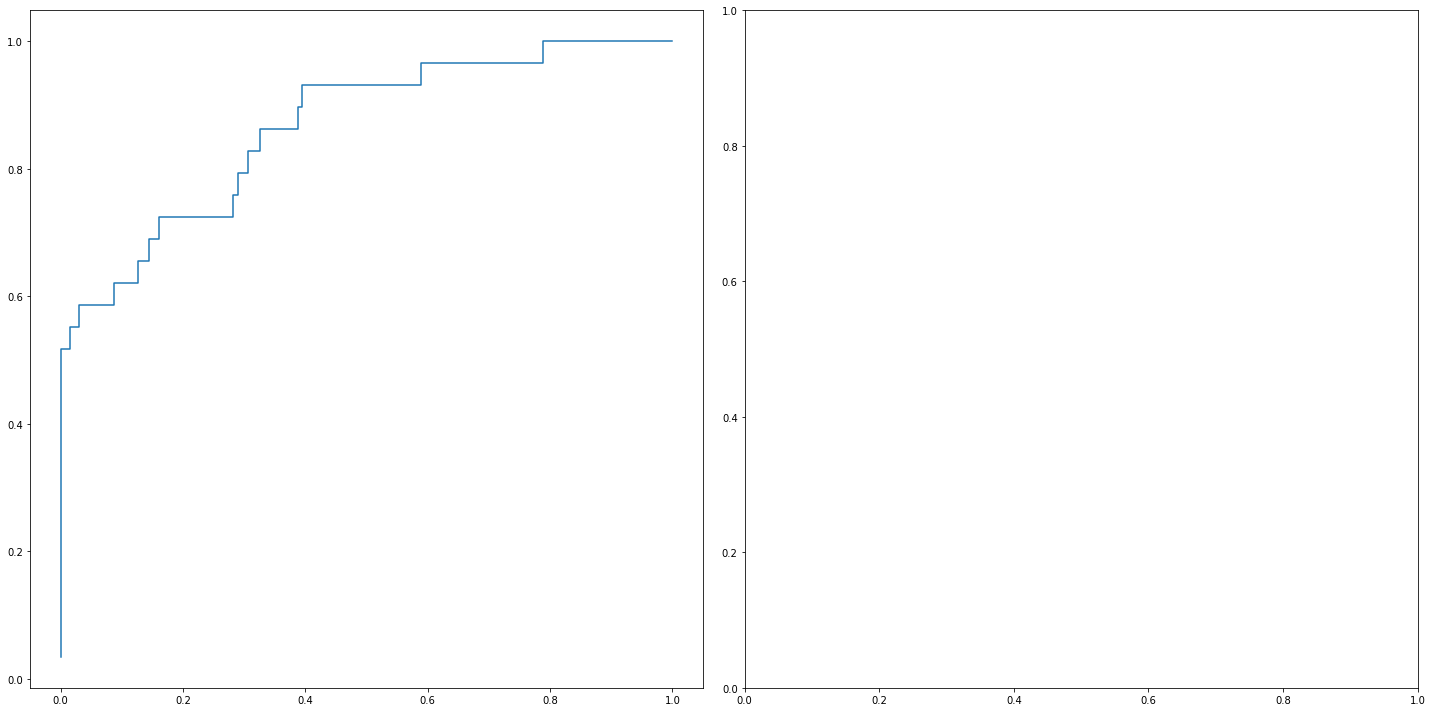

In [130]:
#ROC

vfs2_y, vfs2_y_score = get_mx(d_new)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc2_fig, roc2_ax = plt.subplots(1,2, figsize=(20,10))
#ay_score = cross_val_predict(svm_clf, conf_mx, y, cv=15, method="decision_function")
fprH, tprH, threshH = roc_curve(vfs2_y, vfs2_y_score)
roc2_fig.tight_layout()

roc2_ax[0].plot(fprH, tprH)

### Validation of Directors / Movies

In [ ]:
df_states = pd.read_csv('data/out/t5_states.csv', sep=';', index_col=0, encoding='utf-8')
df_states.shape

In [ ]:
s_new, s_u_new, s_mold = get_truth_matrices(df_states)

C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


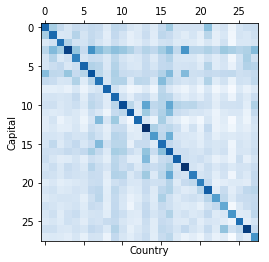

In [57]:
vmin = 0
vmax = 1
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.xlabel('Country')
plt.ylabel('Capital')
ax.matshow(s_new, cmap=color)
fig.show()

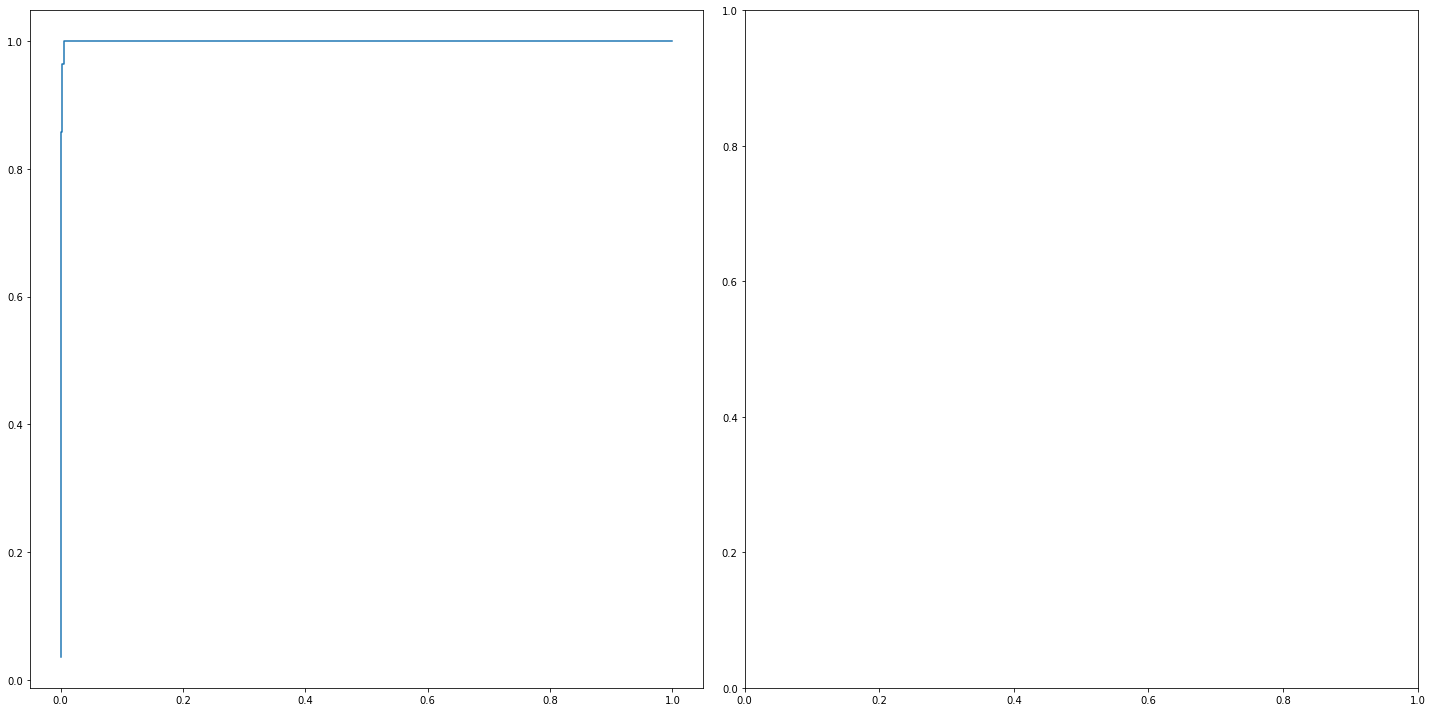

In [58]:
vfs2_y, vfs2_y_score = get_mx(s_new)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc2_fig, roc2_ax = plt.subplots(1,2, figsize=(20,10))
#ay_score = cross_val_predict(svm_clf, conf_mx, y, cv=15, method="decision_function")
fprH, tprH, threshH = roc_curve(vfs2_y, vfs2_y_score)
roc2_fig.tight_layout()
roc2_ax[0].plot(fprH, tprH)

#### Aggregation

[0.34989304 0.26557676 0.25118927 0.24763552 0.24631537 0.23613277
 0.22471282 0.22328377 0.08567668]


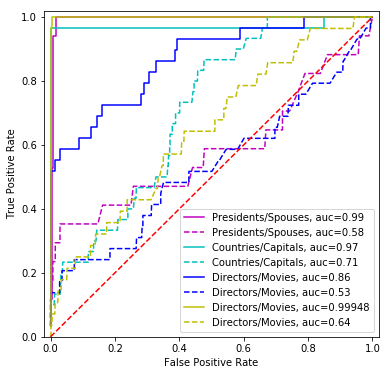

In [58]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

#======SPOUSES===================================================================
#plt.figure().clf()
#ax.figure()
y, y_score = get_mx(w_new)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'m-',label="Presidents/Spouses, auc={:.2f}".format(auc))
#------------------------------------------------------------------
y, y_score = get_mx(w_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'m--',label="Presidents/Spouses, auc={:.2f}".format(auc))
#======COUNTRIES===================================================================
y, y_score = get_mx(c_new)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'c-',label="Countries/Capitals, auc={:.2f}".format(auc))

#------------------------------------------------------------------
y, y_score = get_mx(c_u_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'c--',label="Countries/Capitals, auc={:.2f}".format(auc))
#======DIRECTORS===================================================================
y, y_score = get_mx(d_new)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'b-',label="Directors/Movies, auc={:.2f}".format(auc))

#------------------------------------------------------------------
y, y_score = get_mx(d_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'b--',label="Directors/Movies, auc={:.2f}".format(auc))
#======STATES===================================================================
y, y_score = get_mx(s_new)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'y-',label="Directors/Movies, auc={:.5f}".format(auc))

print(thresh)

#------------------------------------------------------------------
y, y_score = get_mx(s_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax.plot(fpr,tpr,'y--',label="Directors/Movies, auc={:.2f}".format(auc))


ax.plot([0,1],[0,1],'r--')



ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
#ax.tight_layout()

# remove this code to remove the border
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.02, 1.02)

ax.legend(loc=0)

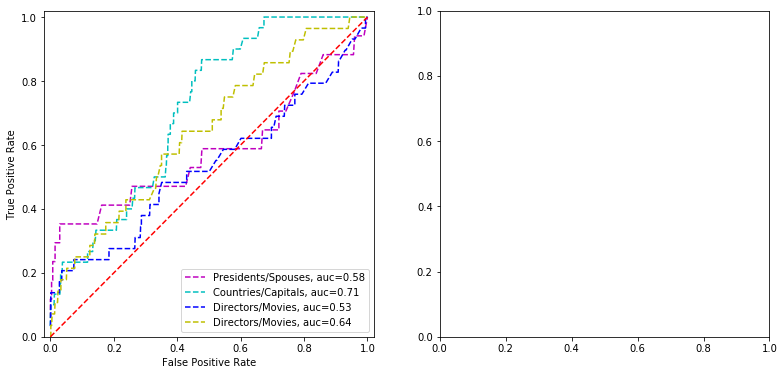

In [66]:
fig, ax = plt.subplots(1,2,figsize=(13,6))
y, y_score = get_mx(w_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax[0].plot(fpr,tpr,'m--',label="Presidents/Spouses, auc={:.2f}".format(auc))
y, y_score = get_mx(c_u_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax[0].plot(fpr,tpr,'c--',label="Countries/Capitals, auc={:.2f}".format(auc))
y, y_score = get_mx(d_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax[0].plot(fpr,tpr,'b--',label="Directors/Movies, auc={:.2f}".format(auc))
y, y_score = get_mx(s_mold)
fpr, tpr, thresh = metrics.roc_curve(y, y_score)
auc = metrics.roc_auc_score(y, y_score)
ax[0].plot(fpr,tpr,'y--',label="Directors/Movies, auc={:.2f}".format(auc))
ax[0].plot([0,1],[0,1],'r--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
#ax.tight_layout()
# remove this code to remove the border
ax[0].set_ylim(0, 1.02)
ax[0].set_xlim(-0.02, 1.02)
ax[0].legend(loc=0)

## Validation on annotated corpus

In [59]:
grec = pd.read_csv('data/grec_birthplaces/t6_grec.csv', index_col = 0, encoding='utf-8', sep=';')

In [ ]:
grec_m, grec_u, grec_mold = get_truth_matrices(grec)

In [ ]:
vmin = 0
vmax = 1
color = plt.cm.Blues

%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.matshow(grec_m, cmap=color)
fig.show()

**Get ground truth values using GREC dataset**

In [60]:
grec_gt = pd.read_csv("data/grec_birthplaces/newyork.csv", sep=';', index_col=0)
grec_gt[:5]

,Score
Entity,
Morris S. Miller,5
Max Ferguson (painter),5
John J. Dunnigan,5
Frederick Juengling,5
Reuel Denney,5


In [61]:
#see the score values etc
print (grec_gt["Score"][:5])
print(len(grec_gt))

Entity
Morris S. Miller          5
Max Ferguson (painter)    5
John J. Dunnigan          5
Frederick Juengling       5
Reuel Denney              5
Name: Score, dtype: int64
132


**Calculate Spearman and Kendall's $\tau$ Correlation value between**

In [62]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r, pval = spearmanr(grec_m["New York City"], grec_gt["Score"])
r_tau, pval_tau = kendalltau(grec_m["New York City"], grec_gt["Score"])

print("Spearman Correlation")
print (r)
print (pval)
print("Tau Correlation")
print (r_tau)
print (pval_tau)

Spearman Correlation
0.40351858405726765
1.6058744026124057e-06
Tau Correlation
0.3168685112880849
3.168968543610265e-06


Text(0.5,0,'Ground Truth (GREC Dataset) score')

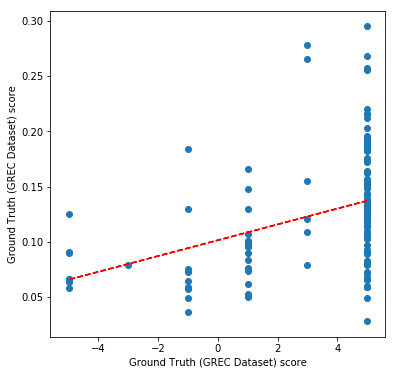

In [93]:
from numpy.polynomial.polynomial import polyfit

x = grec_gt['Score']
y = grec_m['New York City']

fig, ax = plt.subplots(1,1,figsize=(6,6))
b, m = polyfit(x, y, 1)
ax.plot(x, b + m * x, 'r--')
ax.scatter(x,y)

ax.set_ylabel("Ground Truth (GREC Dataset) score")
ax.set_xlabel("Ground Truth (GREC Dataset) score")



**GET AUROC**

In [34]:
grec_predicted = grec_m.values.flatten()
grec_y = grec_gt.applymap(lambda x: x>0)
grec_y['Score'] = grec_y['Score'].astype('int')
grec_y = grec_y.values.flatten()

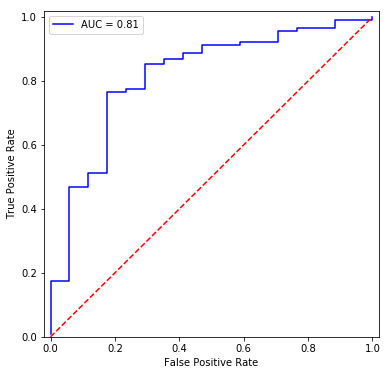

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax = plt.subplots(figsize=(6,6))
fpr, tpr, thresh = roc_curve(grec_y, grec_predicted)
auc = roc_auc_score(grec_y, grec_predicted)
ax.plot(fpr,tpr,'b-',label="AUC = {:.2f}".format(auc))
ax.plot([0,1],[0,1],'r--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
#ax.tight_layout()
# remove this code to remove the border
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.02, 1.02)

ax.legend(loc=0)
fig.savefig("figures/Validation on Annotated Corpus/ROC_Validation_on_Annotated_Corpus.pdf", bbox_inches='tight')
fig.savefig("figures/Validation on Annotated Corpus/ROC_Validation_on_Annotated_Corpus.png", bbox_inches='tight', format='png')

## Store variables

Save the loaded shts

In [68]:
#mold.to_csv('data/out/degmatrices/i2_mold.csv', sep=';')
#mt.to_csv('data/out/degmatrices/i2_mt.csv', sep=';')
#ut.to_csv('data/out/degmatrices/i2_ut.csv', sep=';')

#c_new.to_csv('data/out/degmatrices/t3_countries/c_new.csv', sep=';')
#c_u_new.to_csv('data/out/degmatrices/t3_countries/c_u_new.csv', sep=';')
#c_u_mold.to_csv('data/out/degmatrices/t3_countries/c_u_mold.csv', sep=';')

#w_new.to_csv('data/out/degmatrices/t2_presidents/w_new.csv', sep=';')
#w_u_new.to_csv('data/out/degmatrices/t2_presidents/w_u_new.csv', sep=';')
#w_mold.to_csv('data/out/degmatrices/t2_presidents/w_mold.csv', sep=';')

#d_new.to_csv('data/out/degmatrices/t4_movies/d_new.csv', sep=';')
#d_u_new.to_csv('data/out/degmatrices/t4_movies/d_u_new.csv', sep=';')
#d_mold.to_csv('data/out/degmatrices/t4_movies/d_mold.csv', sep=';')

grec_m.to_csv('data/out/degmatrices/grec/grec_m_ny.csv', sep=';')
grec_u.to_csv('data/out/degmatrices/grec/grec_u_ny.csv', sep=';')
grec_mold.to_csv('data/out/degmatrices/grec/grec_mold_ny.csv', sep=';')

s_new.to_csv('data/out/degmatrices/t5_states/s_new.csv', sep=';')
s_u_new.to_csv('data/out/degmatrices/t5_states/s_u_new.csv', sep=';')
s_mold.to_csv('data/out/degmatrices/t5_states/s_mold.csv', sep=';')

Load the , and concat

In [54]:
i1_mt =  pd.read_csv('data/out/degmatrices/i1_mt.csv', sep=';', index_col=0)
i2_mt =  pd.read_csv('data/out/degmatrices/i2_mt.csv', sep=';', index_col=0)
i1_mt = pd.concat([i1_mt,i2_mt])

i1_ut =  pd.read_csv('data/out/degmatrices/i1_ut.csv', sep=';', index_col=0)
i2_ut =  pd.read_csv('data/out/degmatrices/i2_ut.csv', sep=';', index_col=0)
i1_ut = pd.concat([i1_ut,i2_ut])

i1_mold =  pd.read_csv('data/out/degmatrices/i1_mold.csv', sep=';', index_col=0)
i2_mold =  pd.read_csv('data/out/degmatrices/i2_mold.csv', sep=';', index_col=0)
i1_mold = pd.concat([i1_mold,i2_mold])

i1_mold.to_csv('data/out/degmatrices/ide_mold.csv', sep=';')

i1_mt = pd.read_csv('data/out/degmatrices/ide.csv', sep=';', index_col=0)

w_new = pd.read_csv('data/out/degmatrices/t2_presidents/w_new.csv', sep=';', index_col=0)
w_u_new = pd.read_csv('data/out/degmatrices/t2_presidents/w_u_new.csv', sep=';', index_col=0)
w_mold = pd.read_csv('data/out/degmatrices/t2_presidents/w_mold.csv', sep=';', index_col=0)

c_new =  pd.read_csv('data/out/degmatrices/t3_countries/c_new.csv', sep=',', index_col=0)
c_u_new =  pd.read_csv('data/out/degmatrices/t3_countries/c_u_new.csv', sep=',', index_col=0)
c_u_mold =  pd.read_csv('data/out/degmatrices/t3_countries/c_u_mold.csv', sep=',', index_col=0)

d_new = pd.read_csv('data/out/degmatrices/t4_movies/d_new.csv', sep=';', index_col=0)
d_u_new = pd.read_csv('data/out/degmatrices/t4_movies/d_u_new.csv', sep=';', index_col=0)
d_mold = pd.read_csv('data/out/degmatrices/t4_movies/d_mold.csv', sep=';', index_col=0)

grec_m = pd.read_csv('data/out/degmatrices/grec/grec_m_ny.csv', sep=';', index_col=0)
grec_u = pd.read_csv('data/out/degmatrices/grec/grec_u_ny.csv', sep=';', index_col=0)
grec_mold = pd.read_csv('data/out/degmatrices/grec/grec_mold_ny.csv', sep=';', index_col=0)

s_new = pd.read_csv('data/out/degmatrices/t5_states/s_new.csv', sep=';', index_col=0)
s_u_new = pd.read_csv('data/out/degmatrices/t5_states/s_u_new.csv', sep=';', index_col=0)
s_mold = pd.read_csv('data/out/degmatrices/t5_states/s_mold.csv', sep=';', index_col=0)